Import stuff and define procedure

Regressor score: 0.4730


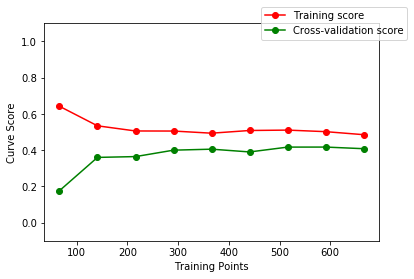

In [28]:
%matplotlib inline
# In this exercise we'll examine a learner which has high variance, and tries to learn
# nonexistant patterns in the data.
# Use the learning curve function from sklearn.learning_curve to plot learning curves
# of both training and testing error.

from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import KFold
from sklearn.metrics import explained_variance_score, make_scorer
import numpy as np
#from sklearn import svm

# Set the learning curve parameters
size = 1000
cv = KFold(size,shuffle=True)
score = make_scorer(explained_variance_score)

# Create a series of data that forces a learner to have high variance
X = np.round(np.reshape(np.random.normal(scale=5,size=2*size),(-1,2)),2)
y = np.array([[np.sin(x[0]+np.sin(x[1]))] for x in X])

def plot_curve():
    reg = DecisionTreeRegressor(max_depth = 5, max_leaf_nodes = 7)
    #reg = svm.SVR(C= 20)

    reg.fit(X,y)
    print "Regressor score: {:.4f}".format(reg.score(X,y))
        
    #train_sizes, train_scores, test_scores = learning_curve(reg,X,y,[50,100,200,250,300,400, 500,600],cv,score)
    train_sizes, train_scores, test_scores = learning_curve(reg,X,y,np.linspace(.1, 1.0, 9),cv,score)
    
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    
    # Plot aesthetics
    plt.ylim(-0.1, 1.1)
    plt.ylabel("Curve Score")
    plt.xlabel("Training Points")
    plt.legend(bbox_to_anchor=(1.1, 1.1))
    plt.show()
    
plot_curve()

Regressor score: 0.3422


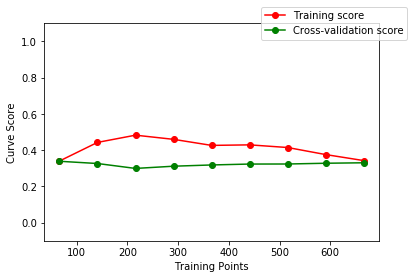

In [29]:
# In this exercise we'll examine a learner which has high bias, and is incapable of
# learning the patterns in the data.
# Use the learning curve function from sklearn.learning_curve to plot learning curves
# of both training and testing error.

from sklearn.linear_model import LinearRegression
from sklearn.learning_curve import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score, make_scorer
from sklearn.cross_validation import KFold
import numpy as np

# Set the learning curve parameters; you'll need this for learning_curves
size = 1000
cv_sets = KFold(size,shuffle=True)
scorer = make_scorer(explained_variance_score)

# Create a series of data that forces a learner to have high bias
# Note for this quiz you do not need to create training and testing sets
X = np.reshape(np.random.normal(scale=2,size=size),(-1,1))
y = np.array([[1 - 2*x[0] +x[0]**2] for x in X])


def plot_curve():
    reg = LinearRegression()
    reg.fit(X,y)
    print "Regressor score: {:.4f}".format(reg.score(X,y))
    
    # TODO: Use learning_curve imported above to create learning curves from X and y.
    # You will need to use 'cv_sets' and 'scorer' as parameters in the function.
    
    train_sizes, train_scores, test_scores = learning_curve(reg,X,y,np.linspace(.1, 1.0, 9),cv_sets,scorer)

    # TODO: Plot the learning curves for both the training scores and testing scores.
    #       Use plt.plot() twice -- one for each score. Be sure to give them labels!
    # NOTE: Using plt.plot(train_scores) will get you 6 lines when we are looking to 
    # plot just 2(mean scores for training and testing). 
    # You can use np.mean(train_scores, axis =1) to get mean train_scores values. 
    # Similarly you can get the mean for the test_scores.
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    # Plot aesthetics
    plt.ylim(-0.1, 1.1)
    plt.ylabel("Curve Score")
    plt.xlabel("Training Points")
    plt.legend(bbox_to_anchor=(1.1, 1.1))
    plt.show()

plot_curve()

In [50]:
from sklearn import svm, grid_search, datasets
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 0.8]}
svr = svm.SVC()

# the classifier is being created. We pass the algorithm (svr) 
# and the dictionary of parameters to try (parameters) and 
# it generates a grid of parameter combinations to try.

clf = grid_search.GridSearchCV(svr, parameters)

#The fit function now tries all the parameter combinations, and returns a fitted classifier 
#that's automatically tuned to the optimal parameter combination. 
#You can now access the parameter values via clf.best_params_.

clf.fit(iris.data, iris.target) 

clf.best_params_

{'C': 0.8, 'kernel': 'linear'}